In [106]:
#import thư viện cần thiết
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [107]:
data = pd.read_csv("/content/drive/MyDrive/dsproject/clean_data/clean_data_v2.csv")

In [108]:
CPU = []
for cpu in data['CPU']:
  cpu = cpu.replace('-', ' - ')
  if len(cpu.split()) >= 2:
    name_cpu = cpu.split()[0:2]
    CPU.append(' '.join(name_cpu))
  else:
    CPU.append(cpu)

data['CPU'] = CPU

In [109]:
data

,Unnamed: 0,Laptop_name,Year,OS,CPU,CPU_Cores,CPU_Threads,CPU_Default_Clock,CPU_Boosted_Clock,CPU_Transistor_Size(nm),...,RAM(GB),RAM_bus,RAM_DDR,Storage(GB),Storage_Type,Display_Inch,Display_Height(pixel),Display_Width(pixel),Weight(kg),Price(USD)
0,0,MSI CreatorPro Z16P B12UKST,2022,Windows,core i7,14,20,2.3,4.7,10,...,32,0,5,1024,SSD,16.0,2560,1600,2.372,3679.0
1,1,"Xiaomi RedmiBook Pro 15, i5-11320H iGPU",2022,Windows,core i5,4,8,2.5,4.5,10,...,16,0,4,512,SSD,15.6,3200,2000,1.745,NaN
2,2,LG Ultra-PC 16 16U70Q-G.AR36G,2022,Windows,ryzen 3,4,8,2.6,3.8,7,...,8,0,4,512,SSD,16.0,1280,1200,1.599,NaN
3,3,Lenovo Legion Slim 7-16IAH 82TF004YGE,2022,Windows,core i7,14,20,2.3,4.7,10,...,16,0,5,1024,SSD,16.0,2560,1600,2.206,2313.0
4,4,Lenovo Legion S7 16ARHA7,2022,Windows,ryzen 9,8,16,3.3,4.9,6,...,16,0,5,1024,SSD,16.0,2560,1600,2.181,1950.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1902,1902,Apple MacBook Pro 14 2021 M1 Pro Entry,2021,MacOS,apple m1,8,8,3.2,NaN,5,...,16,0,4,512,SSD,14.2,3024,1964,1.600,2660.0
1903,1903,Apple MacBook Pro 14 2021 M1 Max 24-Core GPU,2021,MacOS,apple m1,10,10,3.2,NaN,5,...,32,0,4,512,SSD,14.2,3024,1964,1.600,3795.0
1904,1904,Acer Swift 1 SF114-34-P6U1,2021,Linux,pentium silver,4,4,1.1,3.3,10,...,4,0,4,128,SSD,14.0,1920,1080,1.300,413.0
1905,1905,Acer Nitro 5 AN515-45-R36S,2021,Linux,ryzen 7,8,16,3.2,4.4,7,...,16,0,4,1024,SSD,15.6,1920,1080,2.300,NaN


In [110]:
# bỏ cột Stt 
data = data.loc[:, ~data.columns.str.contains('^Unnamed')]

In [111]:
# understanding the data

In [112]:
data.columns

Index(['Laptop_name', 'Year', 'OS', 'CPU', 'CPU_Cores', 'CPU_Threads',
       'CPU_Default_Clock', 'CPU_Boosted_Clock', 'CPU_Transistor_Size(nm)',
       'CPU_L3(MB)', 'CPU_TDP(W)', 'GPU', 'GPU_Memory(GB)', 'GPU_Memory_Type',
       'GPU_Bus_Width(bit)', 'GPU clock(MHz)', 'GPU memory clock(MHz)',
       'RAM(GB)', 'RAM_bus', 'RAM_DDR', 'Storage(GB)', 'Storage_Type',
       'Display_Inch', 'Display_Height(pixel)', 'Display_Width(pixel)',
       'Weight(kg)', 'Price(USD)'],
      dtype='object')

In [113]:
data.head(5)

,Laptop_name,Year,OS,CPU,CPU_Cores,CPU_Threads,CPU_Default_Clock,CPU_Boosted_Clock,CPU_Transistor_Size(nm),CPU_L3(MB),...,RAM(GB),RAM_bus,RAM_DDR,Storage(GB),Storage_Type,Display_Inch,Display_Height(pixel),Display_Width(pixel),Weight(kg),Price(USD)
0,MSI CreatorPro Z16P B12UKST,2022,Windows,core i7,14,20,2.3,4.7,10,24,...,32,0,5,1024,SSD,16.0,2560,1600,2.372,3679.0
1,"Xiaomi RedmiBook Pro 15, i5-11320H iGPU",2022,Windows,core i5,4,8,2.5,4.5,10,8,...,16,0,4,512,SSD,15.6,3200,2000,1.745,NaN
2,LG Ultra-PC 16 16U70Q-G.AR36G,2022,Windows,ryzen 3,4,8,2.6,3.8,7,4,...,8,0,4,512,SSD,16.0,1280,1200,1.599,NaN
3,Lenovo Legion Slim 7-16IAH 82TF004YGE,2022,Windows,core i7,14,20,2.3,4.7,10,24,...,16,0,5,1024,SSD,16.0,2560,1600,2.206,2313.0
4,Lenovo Legion S7 16ARHA7,2022,Windows,ryzen 9,8,16,3.3,4.9,6,16,...,16,0,5,1024,SSD,16.0,2560,1600,2.181,1950.0


In [114]:
data.tail(5)

,Laptop_name,Year,OS,CPU,CPU_Cores,CPU_Threads,CPU_Default_Clock,CPU_Boosted_Clock,CPU_Transistor_Size(nm),CPU_L3(MB),...,RAM(GB),RAM_bus,RAM_DDR,Storage(GB),Storage_Type,Display_Inch,Display_Height(pixel),Display_Width(pixel),Weight(kg),Price(USD)
1902,Apple MacBook Pro 14 2021 M1 Pro Entry,2021,MacOS,apple m1,8,8,3.2,NaN,5,24,...,16,0,4,512,SSD,14.2,3024,1964,1.6,2660.0
1903,Apple MacBook Pro 14 2021 M1 Max 24-Core GPU,2021,MacOS,apple m1,10,10,3.2,NaN,5,48,...,32,0,4,512,SSD,14.2,3024,1964,1.6,3795.0
1904,Acer Swift 1 SF114-34-P6U1,2021,Linux,pentium silver,4,4,1.1,3.3,10,4,...,4,0,4,128,SSD,14.0,1920,1080,1.3,413.0
1905,Acer Nitro 5 AN515-45-R36S,2021,Linux,ryzen 7,8,16,3.2,4.4,7,16,...,16,0,4,1024,SSD,15.6,1920,1080,2.3,NaN
1906,Acer Nitro 5 AN515-57-56HH,2021,Linux,core i5,6,12,2.2,4.5,10,12,...,8,0,4,512,SSD,15.6,1920,1080,2.3,1088.0


In [115]:
data.shape

(1907, 27)

In [116]:
data.isnull().sum() # check data rỗng

Laptop_name                  0
Year                         0
OS                           0
CPU                          0
CPU_Cores                    0
CPU_Threads                  0
CPU_Default_Clock            0
CPU_Boosted_Clock           65
CPU_Transistor_Size(nm)      0
CPU_L3(MB)                   0
CPU_TDP(W)                   0
GPU                          0
GPU_Memory(GB)               0
GPU_Memory_Type            991
GPU_Bus_Width(bit)           0
GPU clock(MHz)               0
GPU memory clock(MHz)        0
RAM(GB)                      0
RAM_bus                      0
RAM_DDR                      0
Storage(GB)                  0
Storage_Type                 0
Display_Inch                 0
Display_Height(pixel)        0
Display_Width(pixel)         0
Weight(kg)                   0
Price(USD)                 952
dtype: int64

In [117]:
# fillna cho 65 chỗ trống
data['CPU_Boosted_Clock'].fillna(value = data['CPU_Boosted_Clock'].mean())

0       4.700000
1       4.500000
2       3.800000
3       4.700000
4       4.900000
          ...   
1902    4.424131
1903    4.424131
1904    3.300000
1905    4.400000
1906    4.500000
Name: CPU_Boosted_Clock, Length: 1907, dtype: float64

In [118]:
# cột GPU_Memory_Type thiếu nhiều quá nên drop
data = data.drop(columns = 'GPU_Memory_Type')

In [119]:
data.columns

Index(['Laptop_name', 'Year', 'OS', 'CPU', 'CPU_Cores', 'CPU_Threads',
       'CPU_Default_Clock', 'CPU_Boosted_Clock', 'CPU_Transistor_Size(nm)',
       'CPU_L3(MB)', 'CPU_TDP(W)', 'GPU', 'GPU_Memory(GB)',
       'GPU_Bus_Width(bit)', 'GPU clock(MHz)', 'GPU memory clock(MHz)',
       'RAM(GB)', 'RAM_bus', 'RAM_DDR', 'Storage(GB)', 'Storage_Type',
       'Display_Inch', 'Display_Height(pixel)', 'Display_Width(pixel)',
       'Weight(kg)', 'Price(USD)'],
      dtype='object')

In [120]:
# fillna cho 65 giá trị trống của CPU_Boosted_Clock
data['CPU_Boosted_Clock'] = data['CPU_Boosted_Clock'].fillna(value=data['CPU_Boosted_Clock'].mean())

In [121]:
data.isnull().sum() # check data rỗng

Laptop_name                  0
Year                         0
OS                           0
CPU                          0
CPU_Cores                    0
CPU_Threads                  0
CPU_Default_Clock            0
CPU_Boosted_Clock            0
CPU_Transistor_Size(nm)      0
CPU_L3(MB)                   0
CPU_TDP(W)                   0
GPU                          0
GPU_Memory(GB)               0
GPU_Bus_Width(bit)           0
GPU clock(MHz)               0
GPU memory clock(MHz)        0
RAM(GB)                      0
RAM_bus                      0
RAM_DDR                      0
Storage(GB)                  0
Storage_Type                 0
Display_Inch                 0
Display_Height(pixel)        0
Display_Width(pixel)         0
Weight(kg)                   0
Price(USD)                 952
dtype: int64

In [122]:
# Tạm thời xóa 952 hàng không có Price
# Sau này lấy 952 hàng này làm Validation set

In [123]:
data = data.dropna()

In [124]:
data.shape

(955, 26)

In [125]:
data.describe()

,Year,CPU_Cores,CPU_Threads,CPU_Default_Clock,CPU_Boosted_Clock,CPU_Transistor_Size(nm),CPU_L3(MB),CPU_TDP(W),GPU_Memory(GB),GPU_Bus_Width(bit),...,GPU memory clock(MHz),RAM(GB),RAM_bus,RAM_DDR,Storage(GB),Display_Inch,Display_Height(pixel),Display_Width(pixel),Weight(kg),Price(USD)
count,955.000000,955.000000,955.000000,955.000000,955.000000,955.000000,955.000000,955.000000,955.000000,955.000000,...,955.000000,955.000000,955.000000,955.000000,955.000000,955.000000,955.000000,955.000000,955.000000,955.000000
mean,2021.464921,7.042932,12.280628,2.420492,4.461616,9.674346,13.839791,31.173822,2.952880,85.679581,...,802.964398,17.089005,146.759162,4.104712,698.839791,15.061675,2229.778010,1297.949738,1.832308,1757.872251
std,0.499029,3.473958,4.840949,0.675828,0.433670,2.158723,6.503868,11.796899,3.727747,99.290449,...,842.486700,9.735465,678.817669,0.385166,388.694113,1.266914,588.817798,372.777975,0.529161,1069.649432
min,2021.000000,2.000000,2.000000,1.000000,2.600000,5.000000,4.000000,6.000000,0.000000,0.000000,...,0.000000,4.000000,0.000000,1.000000,128.000000,11.600000,1366.000000,768.000000,0.719000,263.000000
25%,2021.000000,4.000000,8.000000,2.000000,4.200000,7.000000,8.000000,26.500000,0.000000,0.000000,...,0.000000,16.000000,0.000000,4.000000,512.000000,14.000000,1920.000000,1080.000000,1.400000,1000.000000
50%,2021.000000,6.000000,12.000000,2.400000,4.500000,10.000000,12.000000,28.000000,0.000000,0.000000,...,0.000000,16.000000,0.000000,4.000000,512.000000,15.600000,1920.000000,1080.000000,1.750000,1472.000000
75%,2022.000000,8.000000,16.000000,2.800000,4.700000,10.000000,16.000000,45.000000,6.000000,192.000000,...,1750.000000,16.000000,0.000000,4.000000,1024.000000,15.600000,2560.000000,1440.000000,2.250000,2247.000000
max,2022.000000,16.000000,24.000000,4.800000,5.300000,14.000000,48.000000,55.000000,16.000000,256.000000,...,2250.000000,64.000000,5200.000000,5.000000,2048.000000,17.300000,3840.000000,2400.000000,4.500000,6860.000000


In [126]:
data.nunique()

Laptop_name                955
Year                         2
OS                           3
CPU                         21
CPU_Cores                    8
CPU_Threads                  9
CPU_Default_Clock           25
CPU_Boosted_Clock           24
CPU_Transistor_Size(nm)      6
CPU_L3(MB)                  11
CPU_TDP(W)                  12
GPU                         81
GPU_Memory(GB)               8
GPU_Bus_Width(bit)           6
GPU clock(MHz)              48
GPU memory clock(MHz)       14
RAM(GB)                      6
RAM_bus                     16
RAM_DDR                      4
Storage(GB)                  5
Storage_Type                 1
Display_Inch                19
Display_Height(pixel)       17
Display_Width(pixel)        21
Weight(kg)                 352
Price(USD)                 312
dtype: int64

In [127]:
# Relationship analysis
# Feature hơi nhiều nên chỉ test với một số feature có tính decision cao

In [128]:
data_test = data[['CPU', 'CPU_Cores','CPU_Threads','GPU','GPU_Memory(GB)','RAM(GB)','RAM_DDR','Storage(GB)','Display_Inch','Price(USD)']]

In [129]:
data_test

,CPU,CPU_Cores,CPU_Threads,GPU,GPU_Memory(GB),RAM(GB),RAM_DDR,Storage(GB),Display_Inch,Price(USD)
0,core i7,14,20,rtx a3000 mobile,6,32,5,1024,16.0,3679.0
3,core i7,14,20,geforce rtx 3060 mobile,6,16,5,1024,16.0,2313.0
4,ryzen 9,8,16,radeon rx 6800s,8,16,5,1024,16.0,1950.0
5,core i7,12,16,iris xe graphics g7 96eus,0,16,4,1024,14.2,2311.0
6,ryzen 5,6,12,radeon 660m,0,16,5,512,14.0,1472.0
...,...,...,...,...,...,...,...,...,...,...
1901,apple m1,10,10,apple m1 pro 16-core gpu,0,16,4,1024,16.2,3523.0
1902,apple m1,8,8,apple m1 pro 14-core gpu,0,16,4,512,14.2,2660.0
1903,apple m1,10,10,apple m1 max 24-core gpu,0,32,4,512,14.2,3795.0
1904,pentium silver,4,4,uhd graphics,0,4,4,128,14.0,413.0


In [130]:
corelation = data_test.corr()


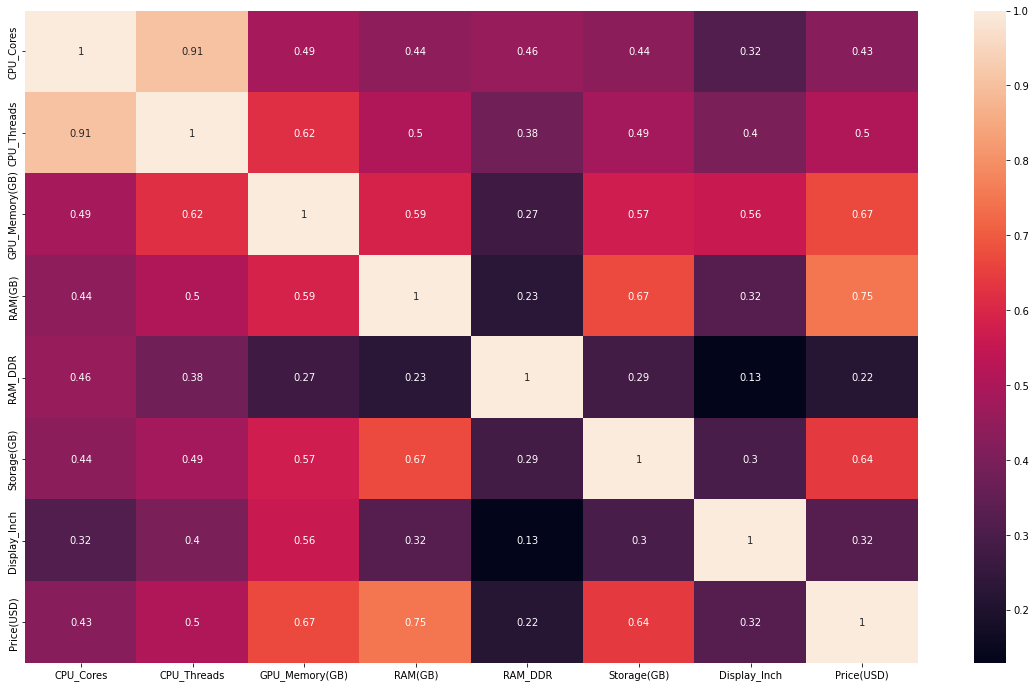

In [131]:
plt.figure(figsize=(20,12))
sns.heatmap(corelation, xticklabels = corelation.columns, yticklabels = corelation.columns, annot = True)

In [139]:
#sns.pairplot(data_test)

In [132]:
#sns.relplot(x='RAM(GB', y='Storage(GB)', hue='CPU_Cores', data = data_test)

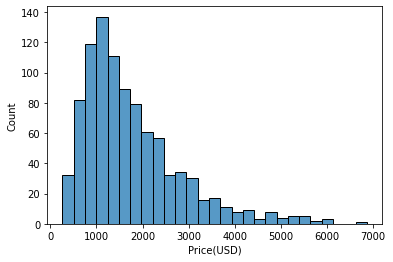

In [133]:
sns.histplot(data_test['Price(USD)'])

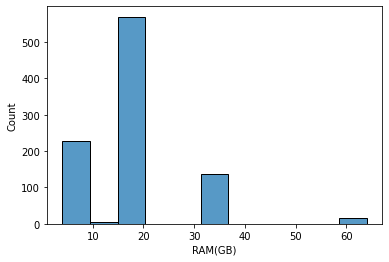

In [134]:
sns.histplot(data_test['RAM(GB)'])

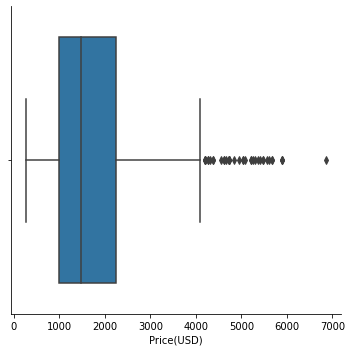

In [135]:
sns.catplot(x='Price(USD)', kind = 'box', data = data_test)

In [136]:
data_test['CPU'].unique()

array(['core i7', 'ryzen 9', 'ryzen 5', 'core i9', 'pentium gold',
       'core i5', 'ryzen 7', 'pentium silver', 'celeron n4120', 'ryzen 3',
       'core i3', 'celeron n5100', 'celeron n4500', 'xeon w',
       'celeron 6305', 'apple m2', 'athlon gold', 'celeron n4020',
       '3020e', 'celeron n4000', 'apple m1'], dtype=object)

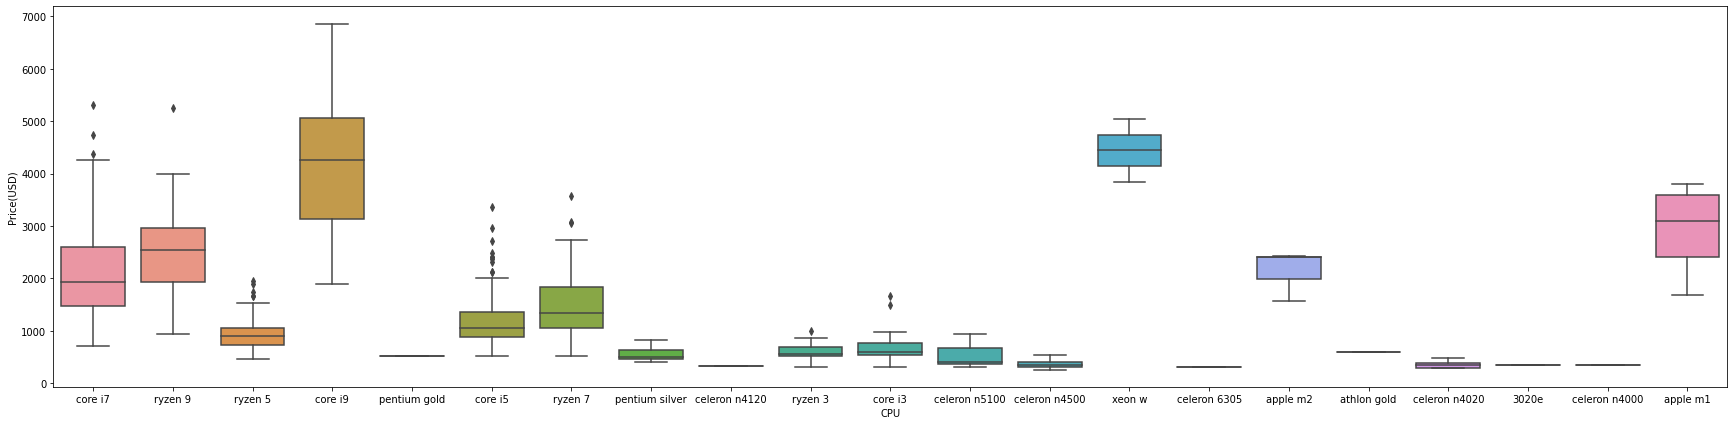

In [137]:
plt.figure(figsize = (30,7))
sns.boxplot(x = 'CPU',y = 'Price(USD)', data = data_test)

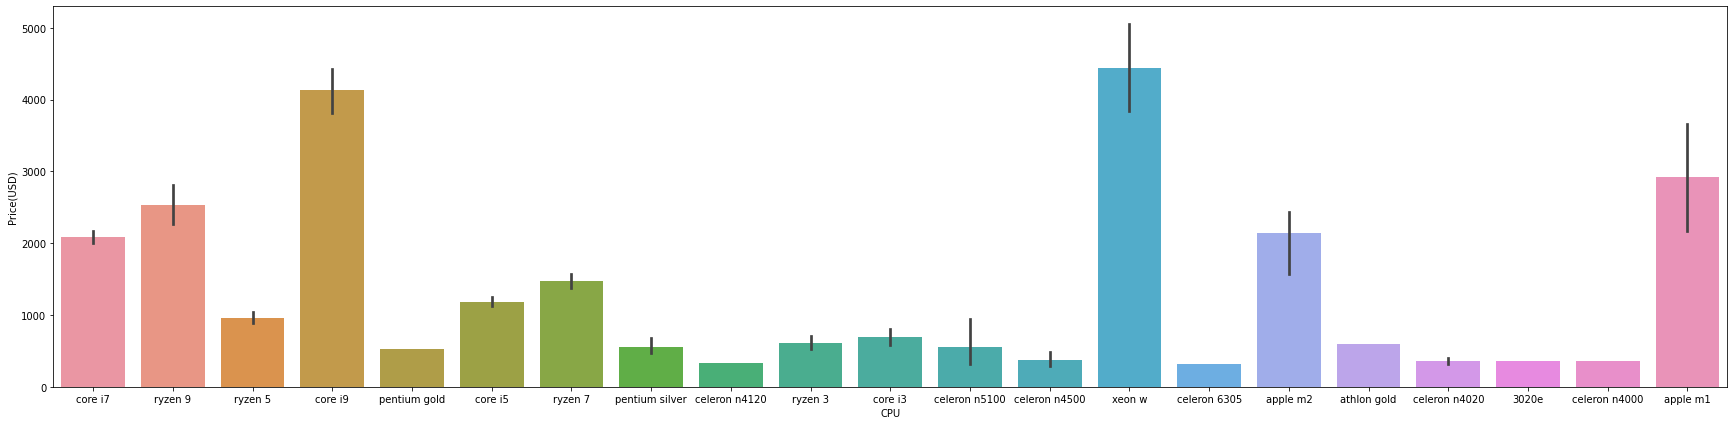

In [138]:
plt.figure(figsize=(30,7))
sns.barplot(
        x = data['CPU'],
        y = data_test['Price(USD)'],
        data = data_test
    )